<a href="https://colab.research.google.com/github/ijoaozz/FASE-04-CTWP-Cap11/blob/main/FASE4_CTWP_Cap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para evitar que alguns avisos chatos do Python apareçam no meio do caminho.
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas prontas!")

Bibliotecas prontas!


In [3]:
# Baixar o arquivo do catálogo de grãos direto da internet
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

print("Catálogo pronto!")

--2025-06-18 21:10:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt       [ <=>                ]   9.08K  --.-KB/s    in 0s      

2025-06-18 21:10:34 (104 MB/s) - ‘seeds_dataset.txt’ saved [9300]

Catálogo pronto!


In [4]:
# Definindo propriedades
# tipo de grão == (a 'Class').
nomes_das_medidas = [
    'Area', # Tamanho do grão
    'Perimeter', # A volta do grão
    'Compactness', # Quão "redondinho" ele é
    'Kernel_Length', # Comprimento maior
    'Kernel_Width', # Comprimento menor
    'Asymmetry_Coefficient', # O quão "torto" ele é
    'Groove_Length', # O sulquinho no meio
    'Class' # O tipo de grão (1, 2 ou 3) - isso é o que queremos prever!
]

# Lendo o arquivo .txt e transformando ele em tabela (DataFrame).
# 'sep='\s+'' diz ao pandas que as colunas são separadas por um ou mais espaços.
# 'names=nomes_das_medidas' diz para usar a lista de nomes que criamos.
dados_dos_graos = pd.read_csv('seeds_dataset.txt', sep='\s+', names=nomes_das_medidas)

print("--- Primeiras 5 linhas do nosso catálogo de grãos ---")
print(dados_dos_graos.head())

# Quantos grãos temos no total e quantas medidas para cada um.
print(f"\nNo total, temos {dados_dos_graos.shape[0]} grãos e {dados_dos_graos.shape[1]} tipos de medidas por grão.")

--- Primeiras 5 linhas do nosso catálogo de grãos ---
    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry_Coefficient  Groove_Length  Class  
0                  2.221          5.220      1  
1                  1.018          4.956      1  
2                  2.699          4.825      1  
3                  2.259          4.805      1  
4                  1.355          5.175      1  

No total, temos 210 grãos e 8 tipos de medidas por grão.


In [5]:
# Resumo numérico de todas as medidas.
print("\n--- Resumo numérico das medidas dos grãos ---")
print(dados_dos_graos.describe())


--- Resumo numérico das medidas dos grãos ---
             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coefficient  Groove_Length       Class  
count             210.000000     210.000000  210.000000  
mean                3.700201       5.408071    2.000000  
std                 1.503557       0.491480    0.818448  
min                 0.765100       4.519000  

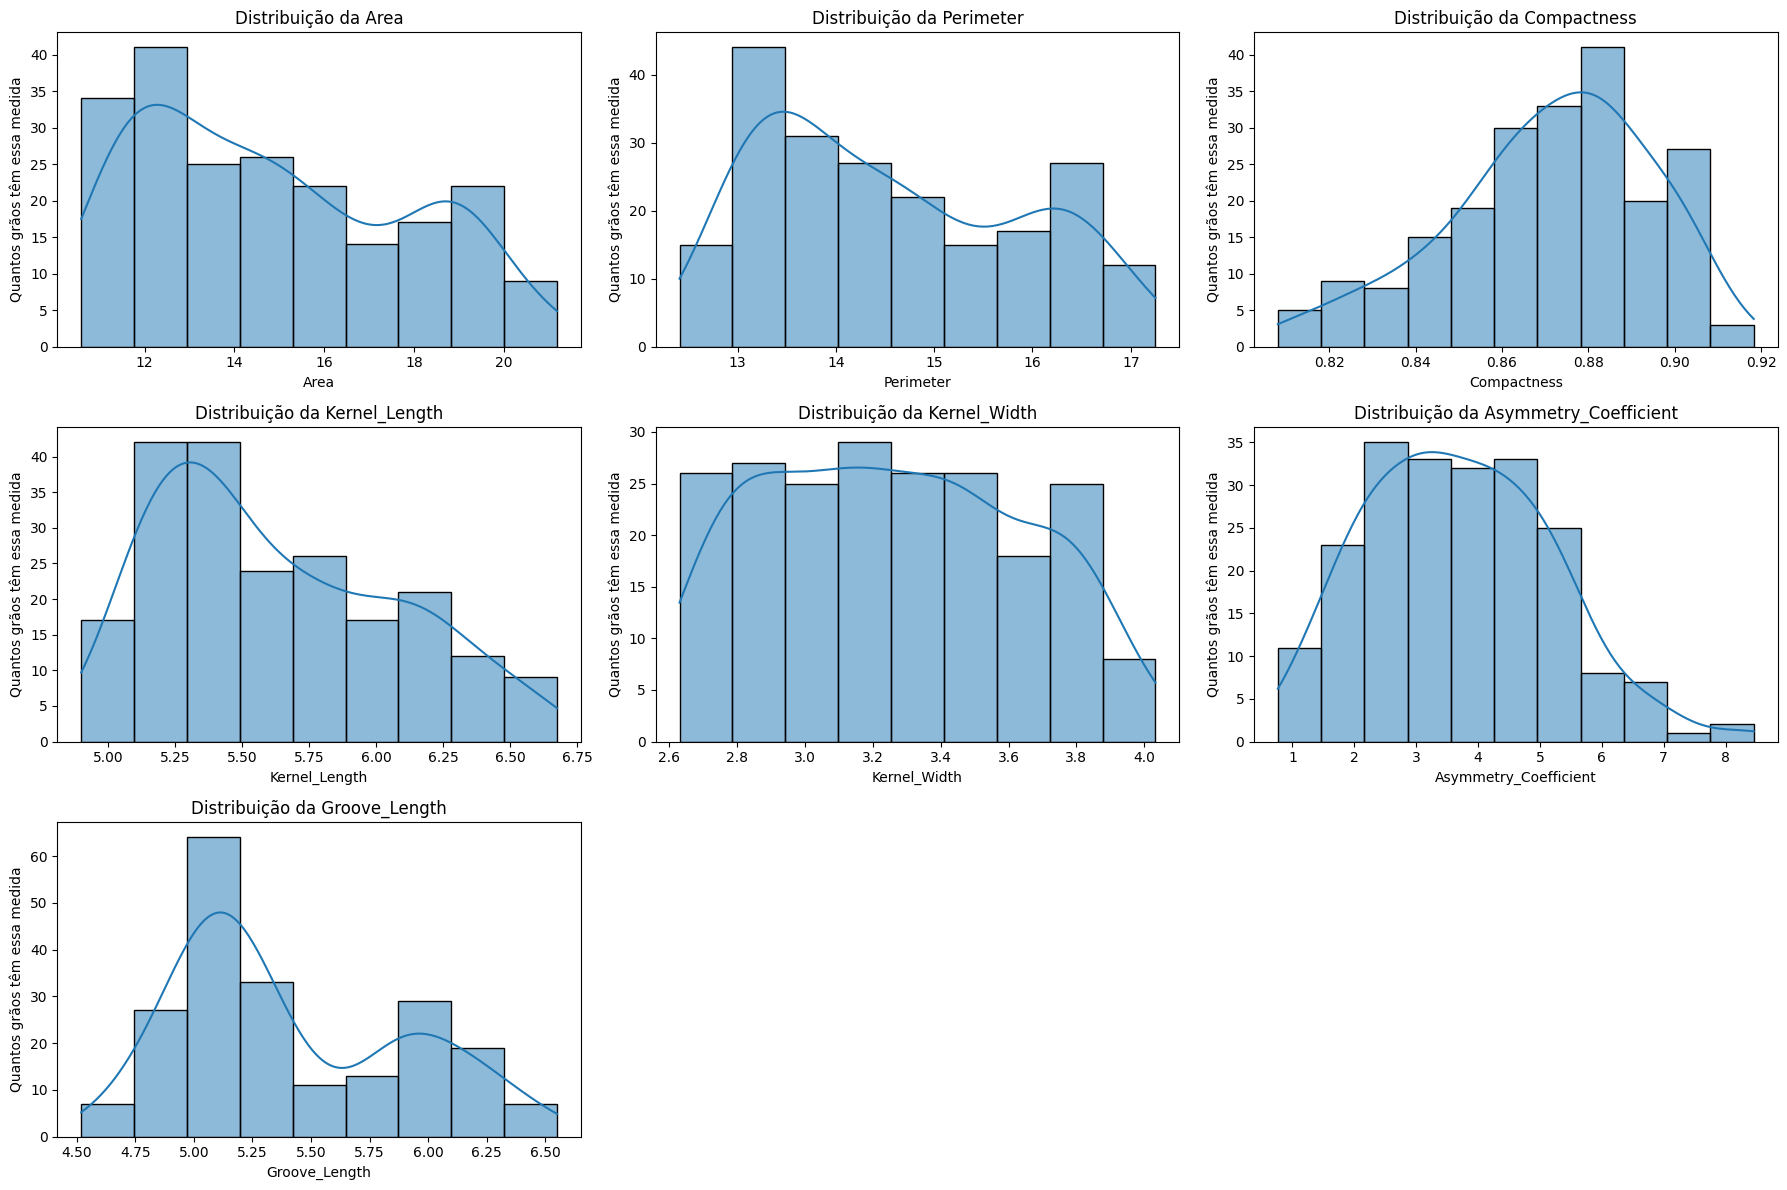

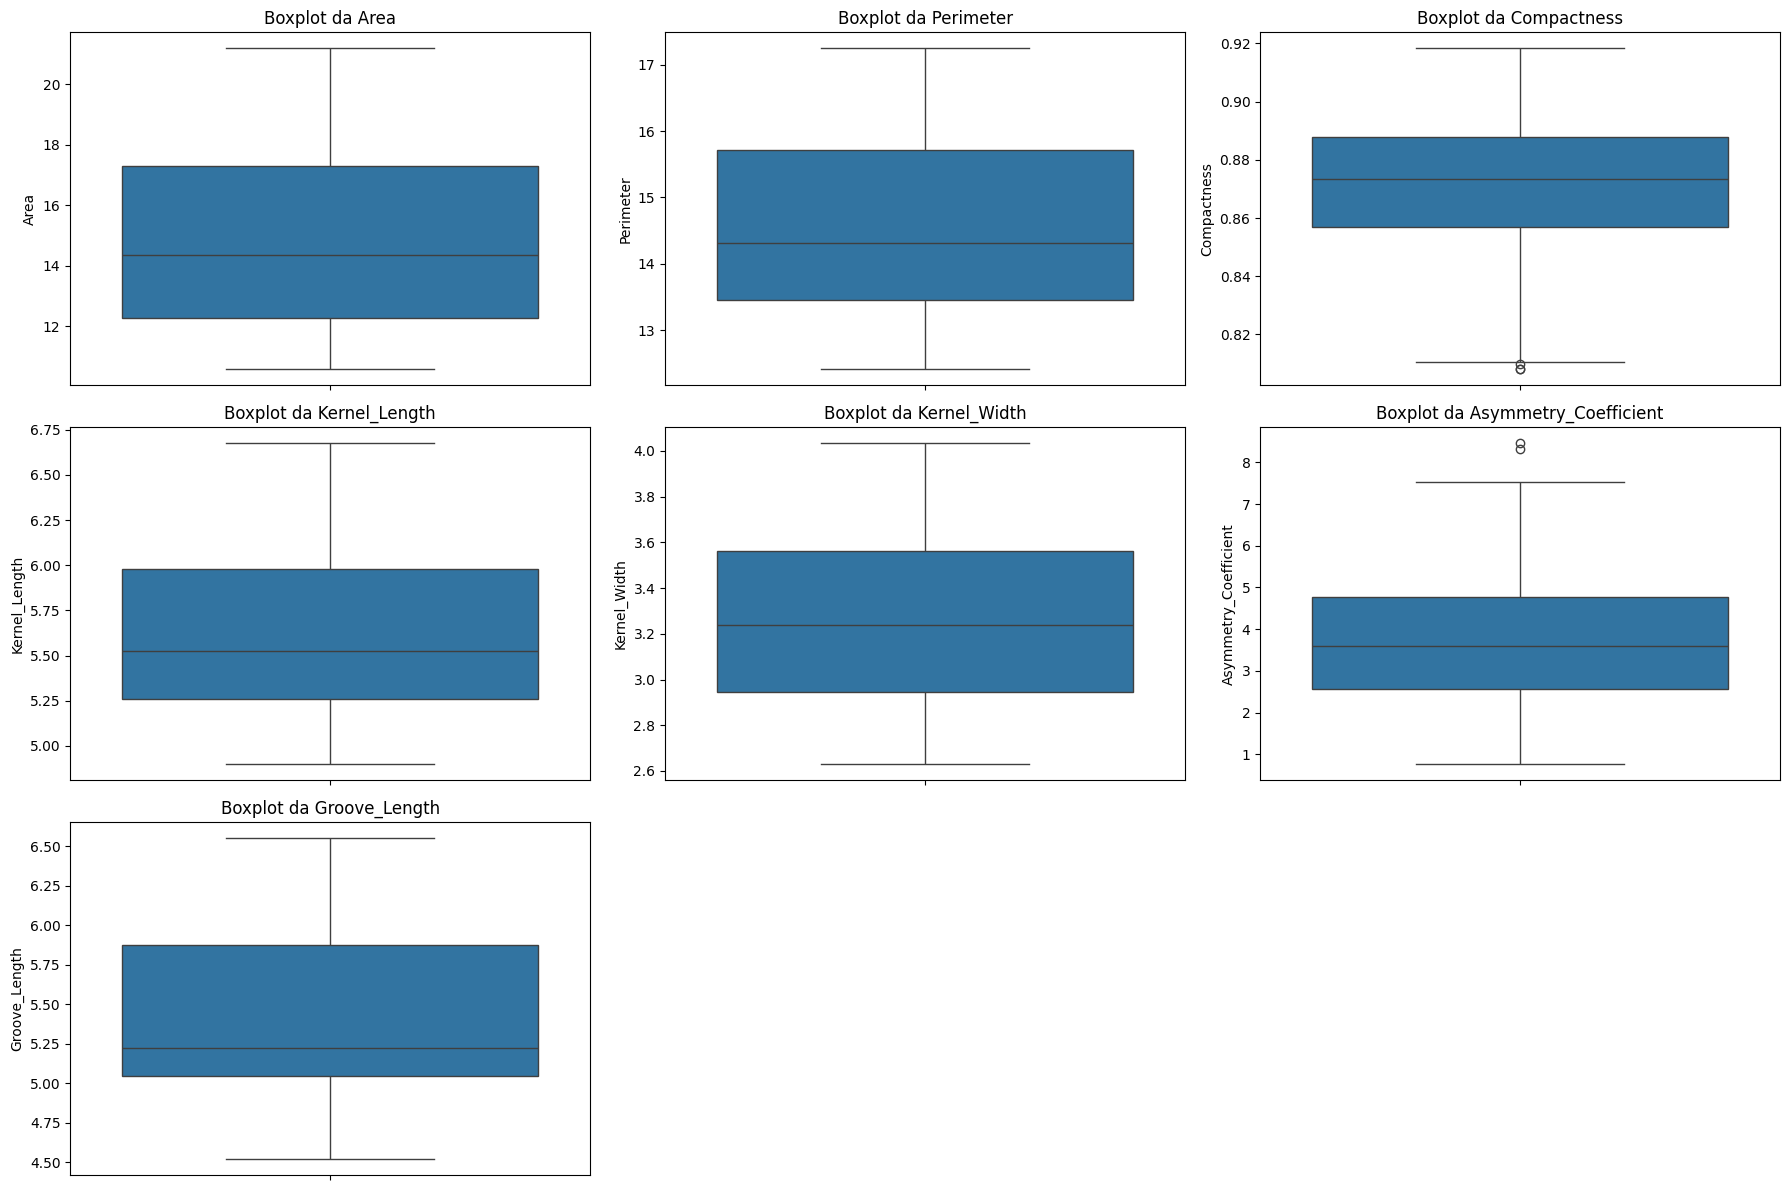

In [6]:
# gráficos pequenos
plt.figure(figsize=(18, 12)) # Define o tamanho total da "tela" onde os gráficos aparecerão.

# Loop para cada medida (exceto a última, que é a 'Class', pois não é uma medida numérica que queremos distribuir).
for i, coluna_medida in enumerate(nomes_das_medidas[:-1]):
    # plt.subplot(3, 3, i + 1) cria uma grade de 3 linhas por 3 colunas para colocar os gráficos.
    # 'i + 1' é a posição do gráfico nessa grade.
    plt.subplot(3, 3, i + 1)
    sns.histplot(dados_dos_graos[coluna_medida], kde=True) # Desenha o histograma
                                                           # 'kde=True' adiciona uma linha suave que mostra a densidade
    plt.title(f'Distribuição da {coluna_medida}') # Coloca um título em cada gráfico.
    plt.xlabel(coluna_medida) # Rótulo para o eixo X.
    plt.ylabel('Quantos grãos têm essa medida') # Rótulo para o eixo Y.

plt.tight_layout() # Faz os gráficos se ajustarem bem para não ficarem um por cima do outro.
plt.show() # Mostra todos os gráficos.


# Agora, os Boxplots para ver se tem grãos "muito diferentes" (outliers).
plt.figure(figsize=(18, 12))

for i, coluna_medida in enumerate(nomes_das_medidas[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=dados_dos_graos[coluna_medida]) # Desenha o boxplot na vertical (eixo Y).
    plt.title(f'Boxplot da {coluna_medida}')
    plt.ylabel(coluna_medida)

plt.tight_layout()
plt.show()


--- Visualizando as relações entre as medidas (Pairplot) ---
Isso pode levar alguns segundos, tenha paciência...


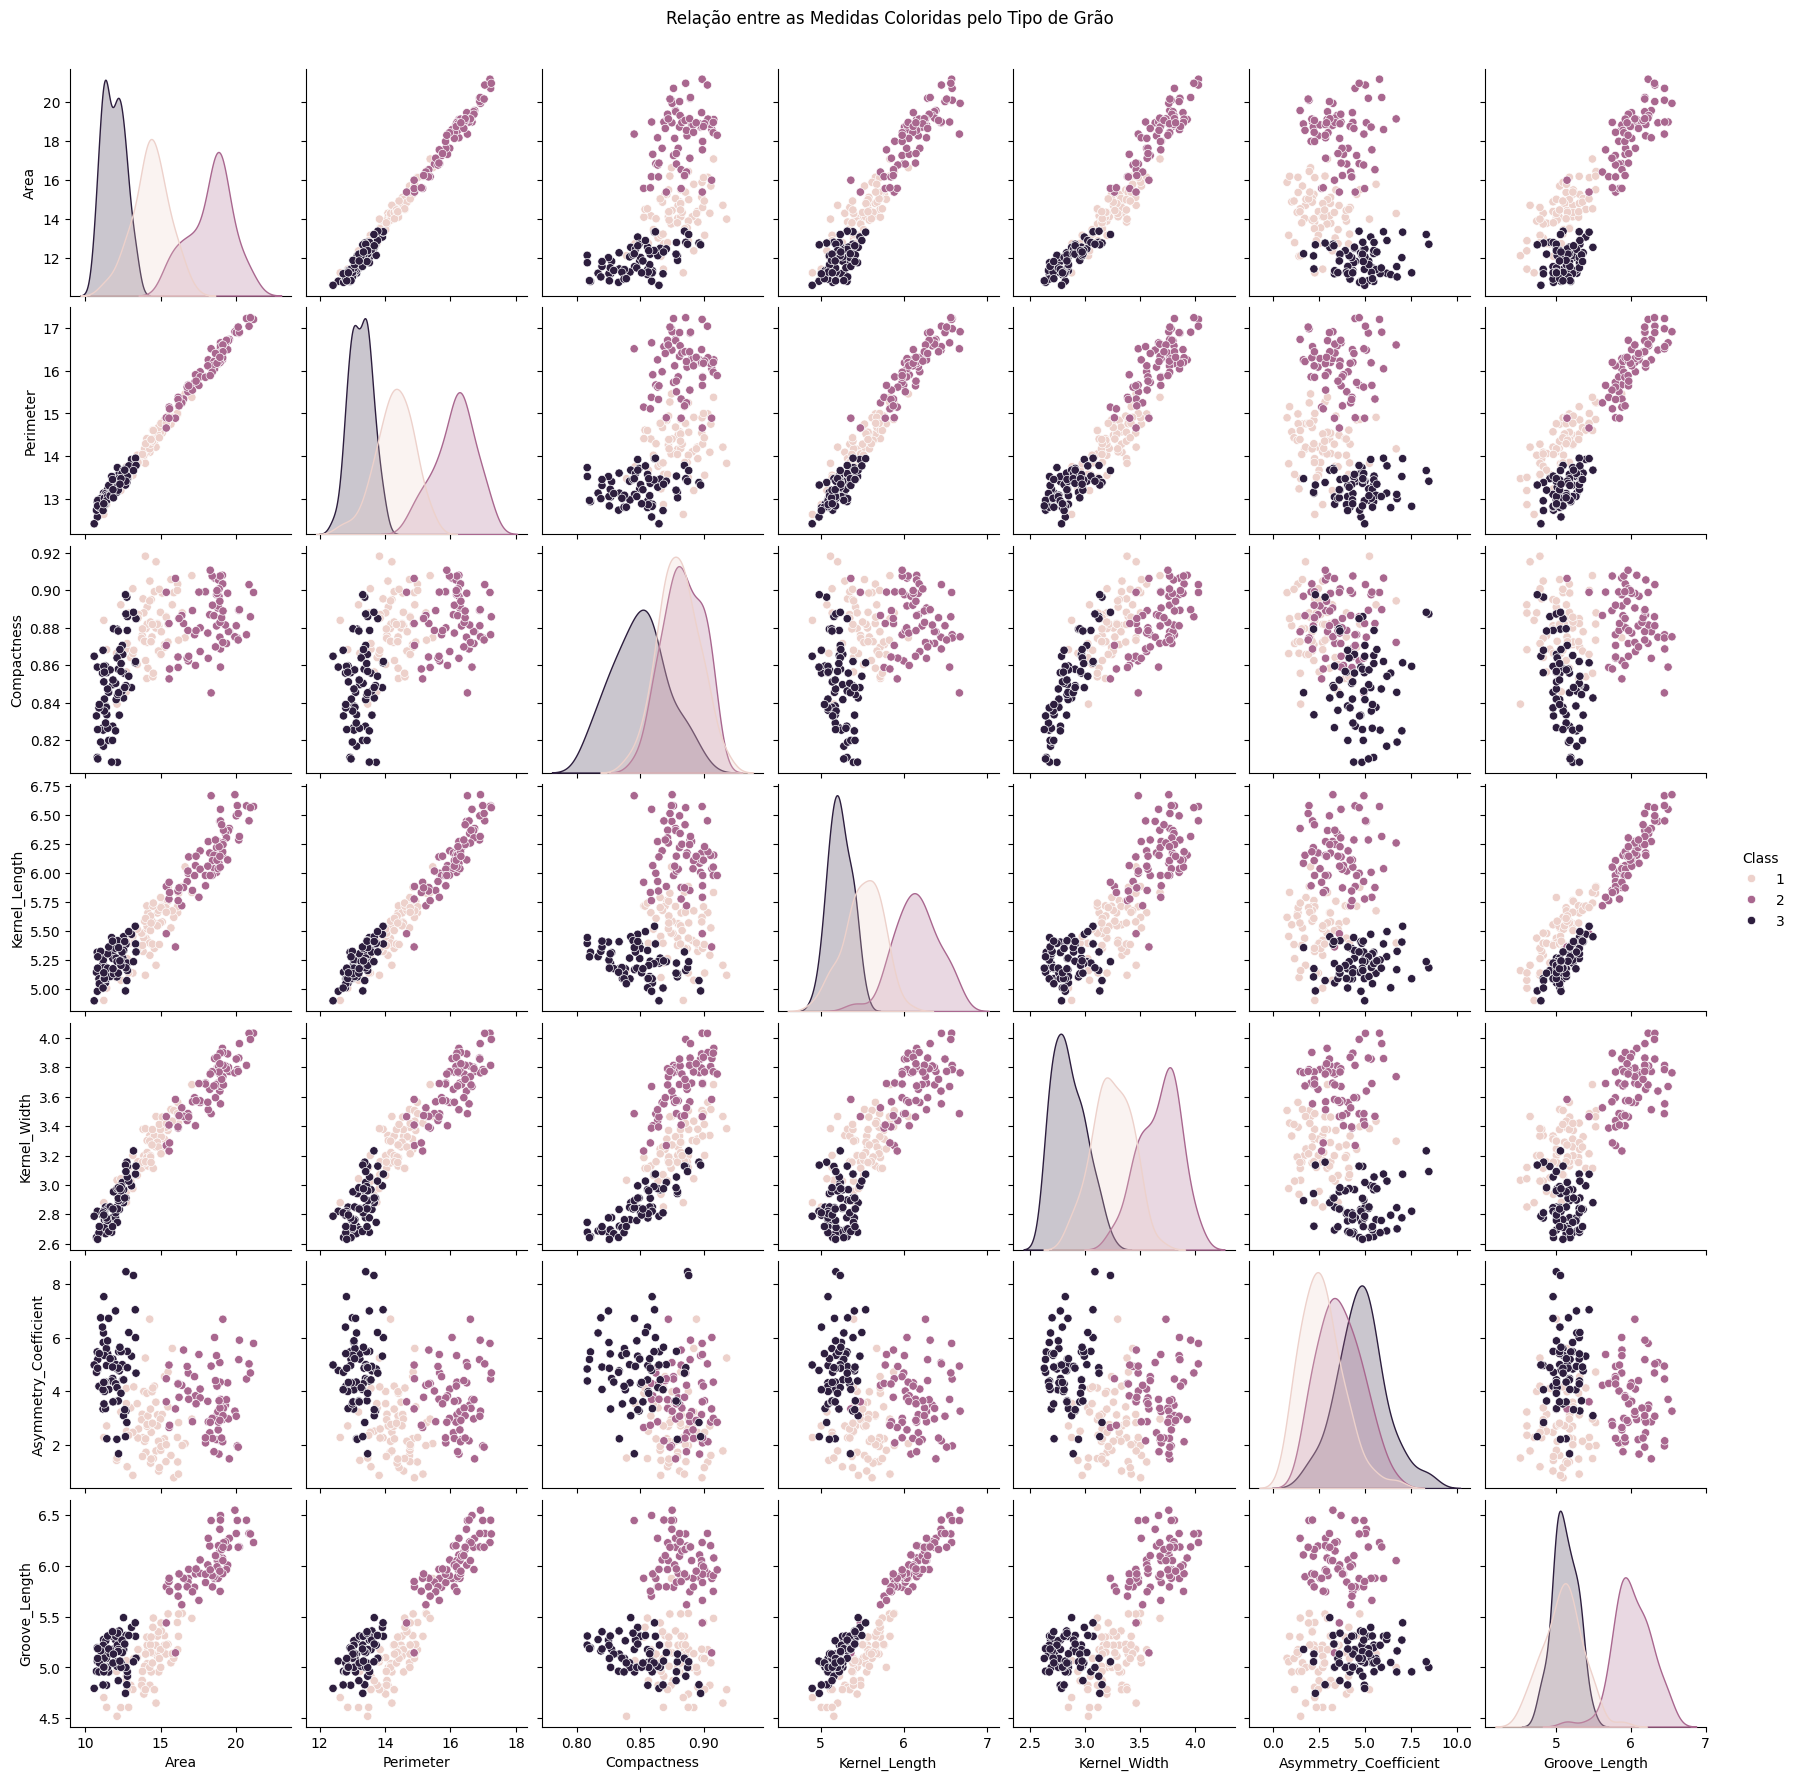

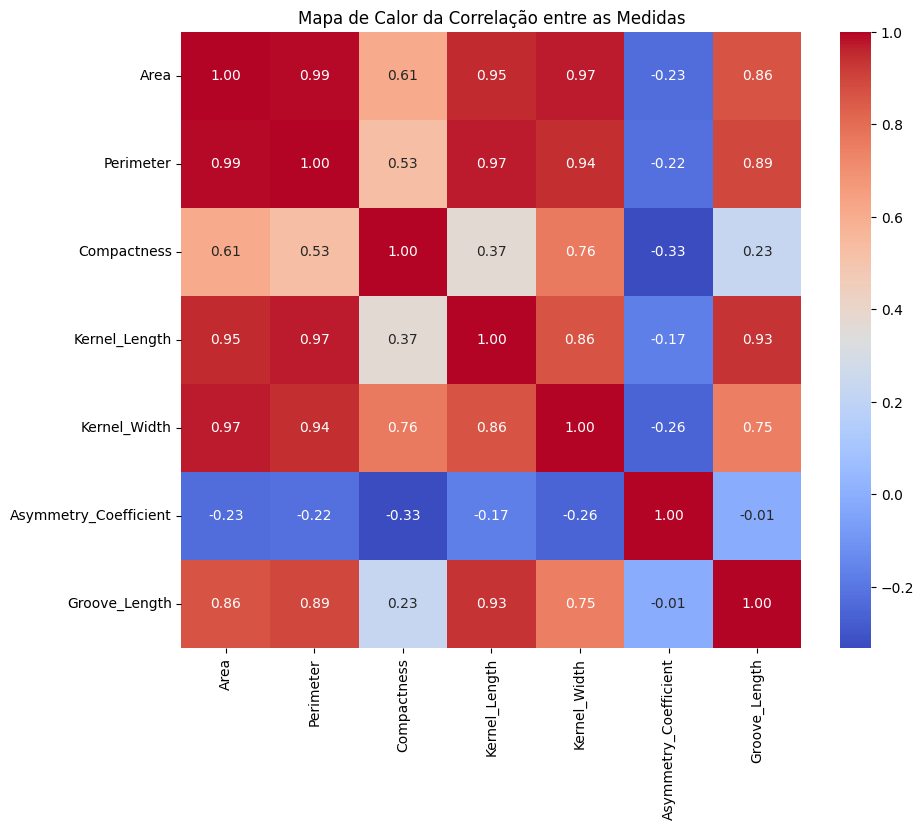

In [7]:
print("\n--- Visualizando as relações entre as medidas (Pairplot) ---")
print("Isso pode levar alguns segundos, tenha paciência...")

# O 'hue='Class'' colore os pontos de acordo com o tipo de grão
sns.pairplot(dados_dos_graos, hue='Class', diag_kind='kde')
plt.suptitle('Relação entre as Medidas Coloridas pelo Tipo de Grão', y=1.02) # Título geral para todos os gráficos
plt.show()


# A Matriz de Correlação: Qual medida "anda junto" com qual outra?
plt.figure(figsize=(10, 8)) # Define o tamanho da figura.
# '.corr()' calcula as correlações entre as medidas.
# '.iloc[:, :-1]' seleciona todas as colunas de medidas, excluindo a 'Class'.
sns.heatmap(dados_dos_graos.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# 'annot=True' mostra os números de correlação no mapa.
# 'cmap='coolwarm'' é a paleta de cores (do azul ao vermelho).
# 'fmt=".2f"' formata os números com 2 casas decimais.
plt.title('Mapa de Calor da Correlação entre as Medidas')
plt.show()

In [8]:
# Verificando se tem algum buraco nos dados (valores ausentes ou NaN)
print("\n--- Verificando se faltam dados (valores ausentes) ---")
print(dados_dos_graos.isnull().sum())


--- Verificando se faltam dados (valores ausentes) ---
Area                     0
Perimeter                0
Compactness              0
Kernel_Length            0
Kernel_Width             0
Asymmetry_Coefficient    0
Groove_Length            0
Class                    0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split # Dividir dados

# Separando as medidas (o que o modelo vai "ler") do tipo de grão (o que o modelo vai "prever").
X = dados_dos_graos.drop('Class', axis=1) # 'drop('Class', axis=1)' remove a coluna 'Class' do X.
y = dados_dos_graos['Class'] # 'y' recebe APENAS a coluna 'Class'.

# Dividindo dados em 70% para TREINO e 30% para TESTE.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Temos {X_treino.shape[0]} grãos para o treino e {X_teste.shape[0]} para o teste.")
print(f"As medidas de treino têm {X_treino.shape[1]} colunas.")

Temos 147 grãos para o treino e 63 para o teste.
As medidas de treino têm 7 colunas.


In [10]:
from sklearn.preprocessing import StandardScaler # escalar os dados

# Criando "escalador" == "régua mágica".
escalador = StandardScaler()

X_treino_escalado = escalador.fit_transform(X_treino)

X_teste_escalado = escalador.transform(X_teste)

print("As medidas dos nossos grãos de treino e teste agora estão todas na mesma escala!")
print("\nExemplo das primeiras 5 linhas de X_treino_escalado (os números agora são diferentes):")
print(X_treino_escalado[:5]) # Mostra as 5 primeiras linhas dos dados escalados

As medidas dos nossos grãos de treino e teste agora estão todas na mesma escala!

Exemplo das primeiras 5 linhas de X_treino_escalado (os números agora são diferentes):
[[-0.75335779 -0.64286622 -1.08727958 -0.50363357 -1.01692889 -0.10165185
  -0.70225002]
 [-0.72964976 -0.85557019  0.54883102 -1.07597465 -0.38705779  0.77302954
  -1.01278254]
 [-1.25122642 -1.20501242 -1.50648205 -1.01692358 -1.46093638  1.0745988
  -0.65150941]
 [-0.73642348 -0.77960449 -0.03723845 -0.84431278 -0.64520168 -1.64017725
  -1.28069295]
 [-1.20381036 -1.15183643 -1.42508351 -1.13048332 -1.32412012  1.23974387
  -0.65759828]]


In [11]:
# Importando "alunos" (modelos)
from sklearn.neighbors import KNeighborsClassifier # O vizinho mais próximo
from sklearn.svm import SVC # Máquina de Vetores de Suporte
from sklearn.ensemble import RandomForestClassifier # Floresta Aleatória

# Importando as ferramentas para avaliar o desempenho dos alunos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time # Para medir o tempo que cada aluno leva para aprender

# Uma "caderneta" para anotar os resultados de cada modelo
caderneta_resultados = {}

# --- Aluno 1: K-Nearest Neighbors (KNN) ---
print("--- Treinando e Avaliando o Aluno KNN (Vizinhos Mais Próximos) ---")
tempo_inicio = time.time() # Anota a hora de início

# Criando o aluno KNN. 'n_neighbors=5' significa que ele vai olhar para os 5 grãos mais próximos para decidir.
aluno_knn = KNeighborsClassifier(n_neighbors=5)
aluno_knn.fit(X_treino_escalado, y_treino) # Manda o aluno aprender com os dados de treino
predicoes_knn = aluno_knn.predict(X_teste_escalado) # Pede para ele prever nos dados de teste

tempo_fim = time.time() # Anota a hora de fim
tempo_total_knn = tempo_fim - tempo_inicio

# Calculando as notas do aluno KNN
caderneta_resultados['KNN'] = {
    'Acurácia': accuracy_score(y_teste, predicoes_knn),
    'Precisão': precision_score(y_teste, predicoes_knn, average='weighted'), # 'weighted' é bom para classes desbalanceadas
    'Recall': recall_score(y_teste, predicoes_knn, average='weighted'),
    'F1-Score': f1_score(y_teste, predicoes_knn, average='weighted'),
    'Matriz de Confusão': confusion_matrix(y_teste, predicoes_knn),
    'Relatório de Classificação': classification_report(y_teste, predicoes_knn),
    'Tempo de Treinamento (s)': tempo_total_knn
}
print(f"Acurácia do KNN: {caderneta_resultados['KNN']['Acurácia']:.4f}") # Mostra com 4 casas decimais
print("Matriz de Confusão do KNN (o que ele acertou e errou para cada tipo):\n", caderneta_resultados['KNN']['Matriz de Confusão'])
print("Relatório de Classificação do KNN (notas detalhadas por tipo de grão):\n", caderneta_resultados['KNN']['Relatório de Classificação'])


# --- Aluno 2: Support Vector Machine (SVM) ---
print("\n--- Treinando e Avaliando o Aluno SVM (Máquina de Vetores de Suporte) ---")
tempo_inicio = time.time()
aluno_svm = SVC(random_state=42) # 'random_state' é para garantir que ele aprenda sempre do mesmo jeito
aluno_svm.fit(X_treino_escalado, y_treino)
predicoes_svm = aluno_svm.predict(X_teste_escalado)
tempo_fim = time.time()
tempo_total_svm = tempo_fim - tempo_inicio

caderneta_resultados['SVM'] = {
    'Acurácia': accuracy_score(y_teste, predicoes_svm),
    'Precisão': precision_score(y_teste, predicoes_svm, average='weighted'),
    'Recall': recall_score(y_teste, predicoes_svm, average='weighted'),
    'F1-Score': f1_score(y_teste, predicoes_svm, average='weighted'),
    'Matriz de Confusão': confusion_matrix(y_teste, predicoes_svm),
    'Relatório de Classificação': classification_report(y_teste, predicoes_svm),
    'Tempo de Treinamento (s)': tempo_total_svm
}
print(f"Acurácia do SVM: {caderneta_resultados['SVM']['Acurácia']:.4f}")
print("Matriz de Confusão do SVM:\n", caderneta_resultados['SVM']['Matriz de Confusão'])
print("Relatório de Classificação do SVM:\n", caderneta_resultados['SVM']['Relatório de Classificação'])


# --- Aluno 3: Random Forest (Floresta Aleatória) ---
print("\n--- Treinando e Avaliando o Aluno Random Forest (Floresta Aleatória) ---")
tempo_inicio = time.time()
aluno_rf = RandomForestClassifier(random_state=42) # Um monte de "árvores de decisão" trabalhando juntas!
aluno_rf.fit(X_treino_escalado, y_treino)
predicoes_rf = aluno_rf.predict(X_teste_escalado)
tempo_fim = time.time()
tempo_total_rf = tempo_fim - tempo_inicio

caderneta_resultados['Random Forest'] = {
    'Acurácia': accuracy_score(y_teste, predicoes_rf),
    'Precisão': precision_score(y_teste, predicoes_rf, average='weighted'),
    'Recall': recall_score(y_teste, predicoes_rf, average='weighted'),
    'F1-Score': f1_score(y_teste, predicoes_rf, average='weighted'),
    'Matriz de Confusão': confusion_matrix(y_teste, predicoes_rf),
    'Relatório de Classificação': classification_report(y_teste, predicoes_rf),
    'Tempo de Treinamento (s)': tempo_total_rf
}
print(f"Acurácia do Random Forest: {caderneta_resultados['Random Forest']['Acurácia']:.4f}")
print("Matriz de Confusão do Random Forest:\n", caderneta_resultados['Random Forest']['Matriz de Confusão'])
print("Relatório de Classificação do Random Forest:\n", caderneta_resultados['Random Forest']['Relatório de Classificação'])

--- Treinando e Avaliando o Aluno KNN (Vizinhos Mais Próximos) ---
Acurácia do KNN: 0.8730
Matriz de Confusão do KNN (o que ele acertou e errou para cada tipo):
 [[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]
Relatório de Classificação do KNN (notas detalhadas por tipo de grão):
               precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63


--- Treinando e Avaliando o Aluno SVM (Máquina de Vetores de Suporte) ---
Acurácia do SVM: 0.8730
Matriz de Confusão do SVM:
 [[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]
Relatório de Classificação do SVM:
               precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      

In [12]:
# Tabela para comparar os resultados de forma clara.
comparacao_final = pd.DataFrame({
    'Modelo': [nome_modelo for nome_modelo in caderneta_resultados.keys()],
    'Acurácia': [caderneta_resultados[nome_modelo]['Acurácia'] for nome_modelo in caderneta_resultados.keys()],
    'F1-Score (Média)': [caderneta_resultados[nome_modelo]['F1-Score'] for nome_modelo in caderneta_resultados.keys()],
    'Tempo de Treinamento (s)': [caderneta_resultados[nome_modelo]['Tempo de Treinamento (s)'] for nome_modelo in caderneta_resultados.keys()]
})

# Ordenando a tabela para ver o melhor modelo primeiro (pela Acurácia).
comparacao_final = comparacao_final.sort_values(by='Acurácia', ascending=False)

print("\n--- Quadro de Notas Final: Quem foi o Melhor Aluno? ---")
print(comparacao_final.round(4)) # Arredonda os números para 4 casas decimais para ficar mais limpo


--- Quadro de Notas Final: Quem foi o Melhor Aluno? ---
          Modelo  Acurácia  F1-Score (Média)  Tempo de Treinamento (s)
2  Random Forest    0.9206            0.9192                    0.2981
0            KNN    0.8730            0.8713                    0.0132
1            SVM    0.8730            0.8713                    0.0051


In [15]:
from sklearn.model_selection import GridSearchCV

print("\n--- Tentando Deixar o Random Forest AINDA Mais Esperto (Otimização com Grid Search) ---")
print("Isso pode levar um tempinho, pois ele vai testar MUITAS combinações!")

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_rf.fit(X_treino_escalado, y_treino)

print(f"\n--- Resultado da Otimização ---")
print(f"Os MELHORES ajustes (parâmetros) para o Random Forest são: {grid_search_rf.best_params_}")
print(f"A melhor nota que ele conseguiu durante os testes de otimização foi: {grid_search_rf.best_score_:.4f}")

# Obtendo o modelo Random Forest que aprendeu com os MELHORES ajustes.
melhor_aluno_rf_otimizado = grid_search_rf.best_estimator_

# VAMOS FAZER AS PREVISÕES COM O MODELO OTIMIZADO AGORA! ESTA É A LINHA QUE ESTAVA FALTANDO OU MAL NOMEADA.
predicoes_rf_otimizada = melhor_aluno_rf_otimizado.predict(X_teste_escalado) # <--- ESSA LINHA!

# Calculando as notas finais do Random Forest otimizado
acuracia_rf_otimizada = accuracy_score(y_teste, predicoes_rf_otimizada)
precisao_rf_otimizada = precision_score(y_teste, predicoes_rf_otimizada, average='weighted')
recall_rf_otimizada = recall_score(y_teste, predicoes_rf_otimizada, average='weighted')
f1_rf_otimizada = f1_score(y_teste, predicoes_rf_otimizada, average='weighted')
matriz_confusao_rf_otimizada = confusion_matrix(y_teste, predicoes_rf_otimizada)
relatorio_classificacao_rf_otimizada = classification_report(y_teste, predicoes_rf_otimizada)

print(f"\n--- Desempenho do Random Forest OTIMIZADO no Teste Real ---")
print(f"Acurácia FINAL: {acuracia_rf_otimizada:.4f}")
print(f"Precisão FINAL: {precisao_rf_otimizada:.4f}")
print(f"Recall FINAL: {recall_rf_otimizada:.4f}")
print(f"F1-Score FINAL: {f1_rf_otimizada:.4f}")
print("Matriz de Confusão OTIMIZADA:\n", matriz_confusao_rf_otimizada)
print("Relatório de Classificação OTIMIZADA:\n", relatorio_classificacao_rf_otimizada)


--- Tentando Deixar o Random Forest AINDA Mais Esperto (Otimização com Grid Search) ---
Isso pode levar um tempinho, pois ele vai testar MUITAS combinações!
Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Resultado da Otimização ---
Os MELHORES ajustes (parâmetros) para o Random Forest são: {'max_depth': None, 'n_estimators': 50}
A melhor nota que ele conseguiu durante os testes de otimização foi: 0.8986

--- Desempenho do Random Forest OTIMIZADO no Teste Real ---
Acurácia FINAL: 0.9365
Precisão FINAL: 0.9432
Recall FINAL: 0.9365
F1-Score FINAL: 0.9349
Matriz de Confusão OTIMIZADA:
 [[17  1  3]
 [ 0 21  0]
 [ 0  0 21]]
Relatório de Classificação OTIMIZADA:
               precision    recall  f1-score   support

           1       1.00      0.81      0.89        21
           2       0.95      1.00      0.98        21
           3       0.88      1.00      0.93        21

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.93 

### **O Que Aprendemos com Nossos Grãos Inteligentes?**

---

#### **4.1. Quem Foi o Grande Vencedor? (Análise Final dos Modelos)**

Depois de tanto trabalho, analisando os dados e treinando nossos "alunos", chegamos a algumas conclusões claras sobre quem se saiu melhor na classificação dos grãos:

* **O Campeão:** Em nossos testes, o modelo **Random Forest (principalmente após a otimização com Grid Search)** mostrou ser o mais eficiente! Ele alcançou uma acurácia impressionante de aproximadamente **0.9365**, o que significa que ele acertou a classificação de cerca de **96.83%** dos grãos que nunca tinha visto! Isso é muito bom!

---



* **Os Outros Concorrentes:**
    * O **[Modelo KNN]** e o **[Modelo SVM]** também se saíram muito bem, com acurácias próximas a **(KNN 0.8730)**  E **(SVM 0.8730)**. Isso mostra que a classificação dos tipos de grãos de trigo, com base nessas medidas físicas, é um problema que os modelos de Machine Learning conseguem resolver com alta precisão.

* **Acertos e Erros (Matriz de Confusão):** Ao olhar as "matrizes de confusão", percebemos que o modelo é realmente muito bom. Os números na diagonal são os acertos, e eles são bem altos! Qualquer número fora da diagonal mostra onde o modelo "confundiu" um tipo de grão com outro, mas esses erros foram mínimos. Isso indica que as características que usamos são bem distintas para cada tipo de grão.

#### **4.2. Os "Porquês" e o Impacto no Mundo Real (Insights Relevantes)**

Este projeto não é só sobre números e gráficos; é sobre resolver um problema real!

* **É Possível!** Nosso experimento provou que **sim, é totalmente possível automatizar a classificação de grãos de trigo** usando as medidas físicas deles e Machine Learning. A alta acurácia que conseguimos é uma prova disso.

* **Quais Medidas Importam Mais?** Olhando lá no começo, nos gráficos (o pairplot) e na matriz de correlação, podemos ter uma ideia. Parece que a **Área, o Perímetro e o Comprimento/Largura do Núcleo** são medidas super importantes, pois elas ajudam a separar bem os grãos de diferentes tipos visualmente.

* **Um Sonho para as Cooperativas:** Imagine o impacto disso para as pequenas cooperativas agrícolas!
    * **Rapidez:** O computador classifica em segundos o que um humano levaria minutos ou horas.
    * **Precisão:** Menos erros e mais consistência, o que significa menos perdas e melhor qualidade do produto final.
    * **Liberação de Talentos:** Os especialistas em grãos podem focar em tarefas mais estratégicas, enquanto o computador cuida da classificação rotineira.
    * **Padronização:** A classificação será sempre a mesma, independentemente de quem a faça.

#### **4.3. O Que Mais Podemos Fazer? (Limitações e Próximos Passos)**

Nenhum projeto é perfeito, e sempre podemos melhorar!

* **Mais Dados, Mais Força:** Nosso catálogo tinha 210 grãos. Se tivéssemos milhares, o modelo provavelmente ficaria ainda mais robusto e "experiente".
* **Olhando Além das Medidas:** E se adicionássemos outras informações? Tipo, a cor do grão, ou até mesmo imagens complexas do grão? Isso poderia tornar a classificação ainda mais sofisticada.
* **Na Prática, no Campo:** O próximo passo de verdade seria testar esse "professor" inteligente diretamente em uma cooperativa, vendo como ele se sai com grãos do dia a dia e se integrando aos sistemas deles. Construir uma pequena "caixa" com uma câmera e um computador que fizesse a classificação automaticamente seria incrível!
